ValueError: too many values to unpack (expected 2)

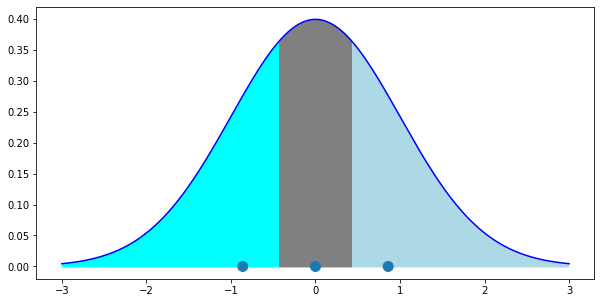

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats
#plt.style.use('ggplot')
mean=0
std=1
sc_location=.86
dividing_line = sc_location / 2

x=np.linspace(-3, 3, 1000)
iq=stats.norm(mean,std)
fig, axis = plt.subplots(1,1, figsize=(10,5))

axis.plot(x,iq.pdf(x),'b')

px=np.arange(-3,-dividing_line,.01)
axis.fill_between(px,iq.pdf(px),color='cyan')

px=np.arange(dividing_line,3,.01)
axis.fill_between(px,iq.pdf(px),color='lightblue')

px=np.arange(-dividing_line, dividing_line,.01)
axis.fill_between(px,iq.pdf(px),color='gray')

ccx = [-sc_location, 0, sc_location]
ccy = [0,0,0]
cc = zip(ccx, ccy)

axis.scatter(ccx, ccy, s=[100,100,100])
axis.annotate(cc, ["A", "B", "C"])

In [3]:
count = 10000
for dim in [1,2,3]:
    x = np.random.normal(0, 1, dim * count)
    x = np.array(x)
    x = x.reshape((count, dim))
    x = np.sum(x * x, axis = 1)
    x = np.mean(np.sqrt(x))
    print("dim %d euclidean of noise: %5.2f" % (dim, x * .05))

dim 1 euclidean of noise:  0.04
dim 2 euclidean of noise:  0.06
dim 3 euclidean of noise:  0.08


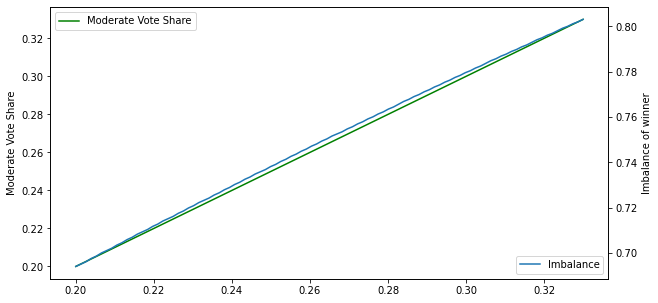

In [14]:
def CumulativeNormalDistribution(xRaw: float) -> float:
    if xRaw < 0:
        neg = 1
    else:
        neg = 0

    k = 1.0 / (1.0 + 0.2316419 * abs(xRaw))
    y = ((((1.330274429 * k - 1.821255978) * k + 1.781477937) * k - 0.356563782) * k + 0.319381530) * k
    y = 1.0 - 0.398942280401 * np.exp(-0.5 * (xRaw * xRaw)) * y
    return (1.0 - neg) * y + neg * (1.0 - y)

def plot_cdf():
    x = np.linspace(-5, 5, 1000)
    y = [CumulativeNormalDistribution(xx) for xx in x]
    fix, axis = plt.subplots(1,1,figsize = (10,5))
    axis.plot(x, y)

def find_cdf_value(v: float):
    xx = np.linspace(0, .5, 1000)
    y0 = CumulativeNormalDistribution(0)
    for x in xx:
        if CumulativeNormalDistribution(x) - y0 > v:
            return x


def plot_c_share():
    c_share = []
    lr_balance = []

    xx = np.linspace(.20, .33, 100)
    for x in xx:
        half_c = x / 2
        boundary = find_cdf_value(half_c)
        c_share.append(x)
        lr_balance.append(CumulativeNormalDistribution(2 * boundary))


        # print("centrist_share of %.3f is %6.4f left/right balance of %6.4f" %
        #       (x, boundary, CumulativeNormalDistribution(2 * boundary)))

    fix, axis = plt.subplots(1,1,figsize = (10,5))
    axis.plot(xx, c_share, label="Moderate Vote Share", color="green")
    axis.set_ylabel("Moderate Vote Share")
    ax2 = axis.twinx()
    ax2.plot(xx, lr_balance, label="Imbalance")
    ax2.set_ylabel("Imbalance of winner")
    axis.legend(loc="upper left")
    ax2.legend(loc="lower right")

plot_c_share()